# Assignment - 2 // Shubhankar Thakar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
from datetime import datetime

In [3]:
apple = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv')

In [4]:
apple.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


In [5]:
apple['Date'] = pd.to_datetime(apple['Date'])

In [6]:
type(apple['Date'][0])

pandas._libs.tslib.Timestamp

In [7]:
apple = apple.set_index('Date')

In [8]:
apple.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL


# Plot of Apple's Close Price and 100 days Moving Average

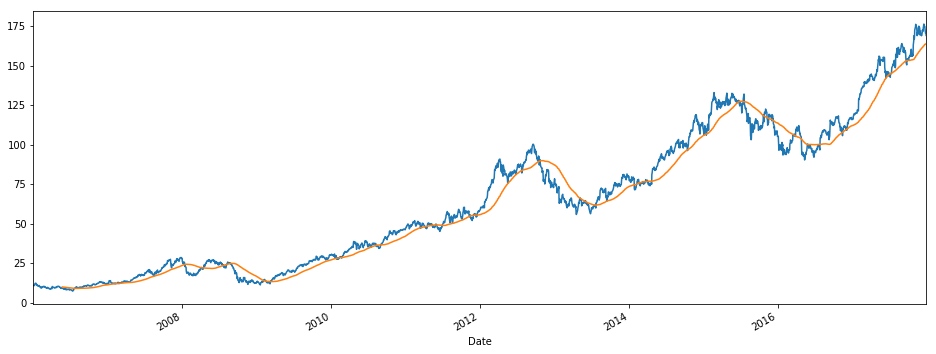

In [9]:
apple['Close'].plot(figsize = (16,6))
apple['Close'].rolling(100).mean().plot()

In [10]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# ETS Decomposition plot

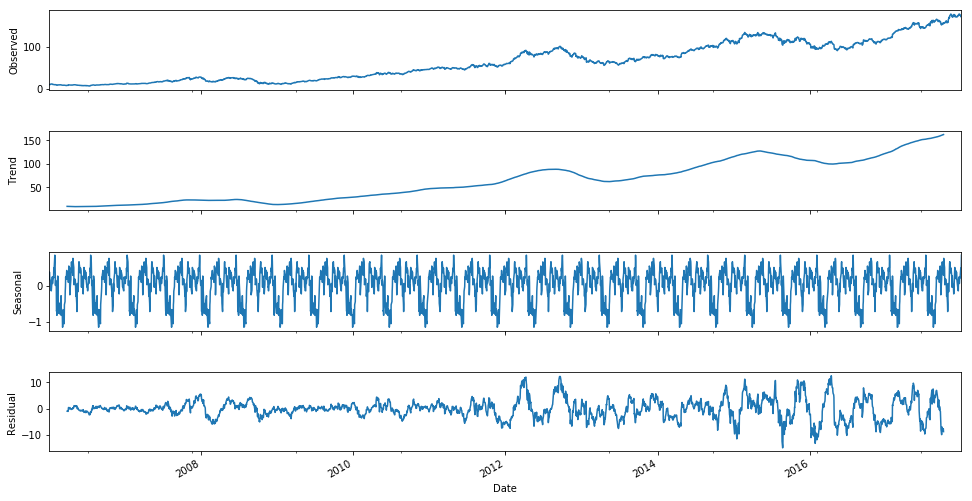

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(apple['Close'], freq=120)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

# Picking up stocks from 4 differnt sectors (Energy, banking, tech, retail)

In [12]:
xom = pd.read_csv('XOM_2006-01-01_to_2018-01-01.csv',index_col = 'Date', parse_dates=True)
jpm = pd.read_csv('JPM_2006-01-01_to_2018-01-01.csv',index_col = 'Date', parse_dates=True)
cisco = pd.read_csv('CSCO_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates=True)
walmart = pd.read_csv('WMT_2006-01-01_to_2018-01-01.csv', index_col = 'Date', parse_dates=True)

In [13]:
xom = xom['Close']
jpm = jpm['Close']
cisco = cisco['Close']
walmart = walmart['Close']


In [14]:
port = pd.concat([xom,jpm,cisco,walmart],axis = 1)

In [15]:
port.columns = ['xom','jpm','cisco','walmart']

In [16]:
port.head()

,xom,jpm,cisco,walmart
Date,,,,
2006-01-03,58.47,40.19,17.45,46.23
2006-01-04,58.57,39.62,17.85,46.32
2006-01-05,58.28,39.74,18.35,45.69
2006-01-06,59.43,40.02,18.77,45.88
2006-01-09,59.40,40.67,19.06,45.71


# Plot of Close Prices 

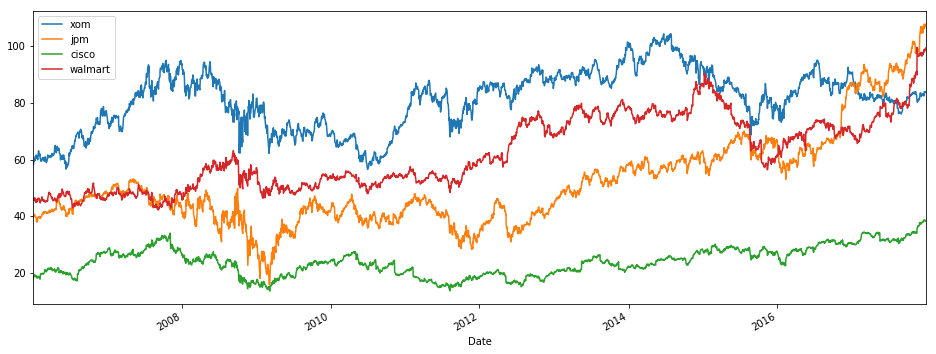

In [17]:
port.plot(figsize = (16,6))

# Calculating Daily Percent Changes 

In [18]:
port['xom_returns'] = port['xom'].pct_change(1)
port['jpm_returns'] = port['jpm'].pct_change(1)
port['cisco_returns'] = port['cisco'].pct_change(1)
port['walmart_returns'] = port['walmart'].pct_change(1)

In [19]:
port.head()

,xom,jpm,cisco,walmart,xom_returns,jpm_returns,cisco_returns,walmart_returns
Date,,,,,,,,
2006-01-03,58.47,40.19,17.45,46.23,NaN,NaN,NaN,NaN
2006-01-04,58.57,39.62,17.85,46.32,0.001710,-0.014183,0.022923,0.001947
2006-01-05,58.28,39.74,18.35,45.69,-0.004951,0.003029,0.028011,-0.013601
2006-01-06,59.43,40.02,18.77,45.88,0.019732,0.007046,0.022888,0.004158
2006-01-09,59.40,40.67,19.06,45.71,-0.000505,0.016242,0.015450,-0.003705


# Distribution of Daily Returns

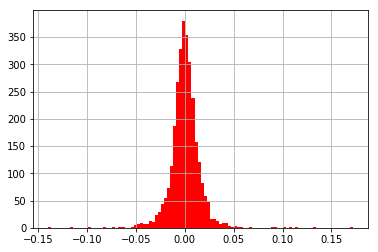

In [20]:
port['xom_returns'].hist(bins=100, color = "red")

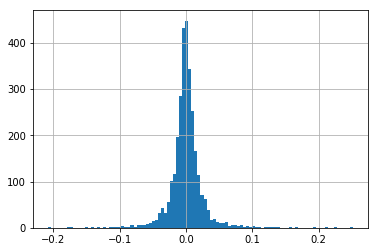

In [21]:
port['jpm_returns'].hist(bins=100)

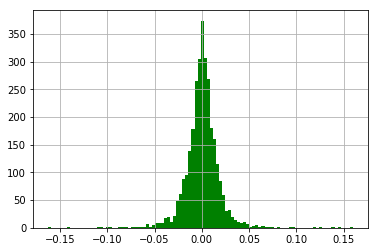

In [22]:
port['cisco_returns'].hist(bins=100, color= "green")

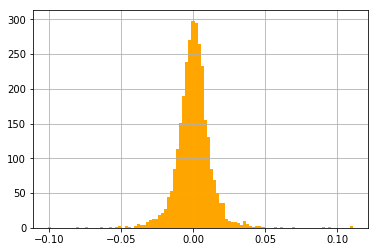

In [23]:
port['walmart_returns'].hist(bins=100, color = "orange")

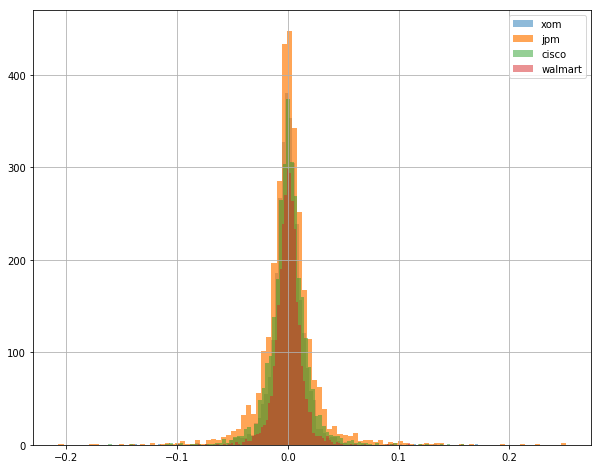

In [24]:
port['xom_returns'].hist(bins=100,label = 'xom',figsize = (10,8),alpha=0.5)
port['jpm_returns'].hist(bins=100,label = 'jpm',alpha=0.7)
port['cisco_returns'].hist(bins=100,label = 'cisco',alpha=0.5)
port['walmart_returns'].hist(bins=100, label = 'walmart',alpha=0.5)
plt.legend()

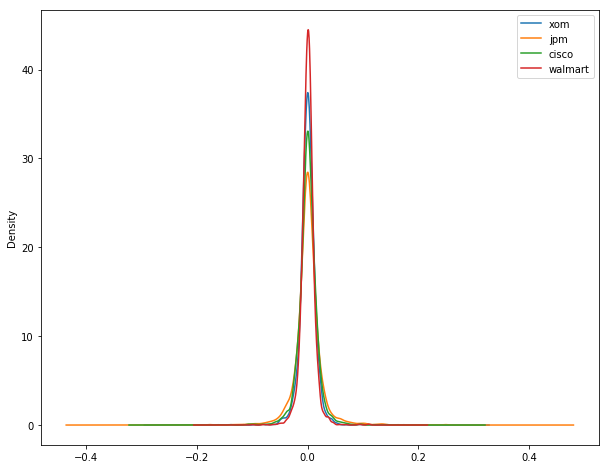

In [60]:
port['xom_returns'].plot(kind = 'kde',label = 'xom',figsize = (10,8))
port['jpm_returns'].plot(kind = 'kde',label = 'jpm')
port['cisco_returns'].plot(kind ='kde',label = 'cisco')
port['walmart_returns'].plot(kind = 'kde', label = 'walmart')
plt.legend()

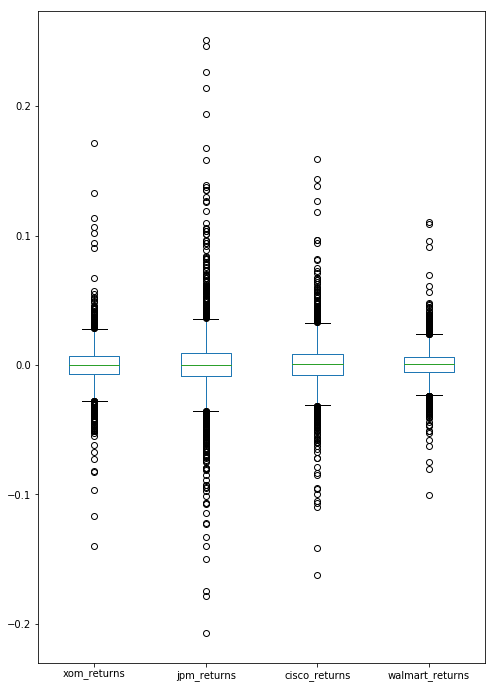

In [25]:
port[['xom_returns','jpm_returns','cisco_returns','walmart_returns']].plot(kind = 'box', figsize = (8,12))

# Pairplot of Stock returns

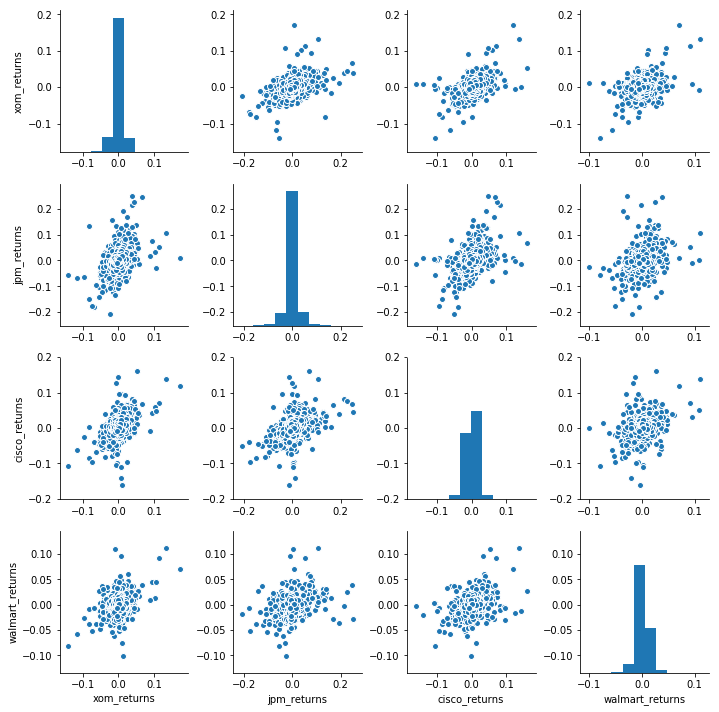

In [26]:
import seaborn as sns
sns.pairplot(port[['xom_returns','jpm_returns','cisco_returns','walmart_returns']].dropna())

# Importing All Stocks File

In [27]:
all = pd.read_csv('all_stocks_2006-01-01_to_2018-01-01.csv',index_col = 'Date', parse_dates=True)

In [28]:
all.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,77.76,79.35,77.24,79.11,3117200,MMM
2006-01-04,79.49,79.49,78.25,78.71,2558000,MMM
2006-01-05,78.41,78.65,77.56,77.99,2529500,MMM
2006-01-06,78.64,78.90,77.64,78.63,2479500,MMM
2006-01-09,78.50,79.83,78.46,79.02,1845600,MMM


In [41]:
all2 = all.reset_index()

In [42]:
all2 = all2.groupby('Date').sum().sort_values('Volume' ,ascending =False)

# Total Volume Traded on a Particular Day 
# Volume Traded reached its peak aroud 2008 market crash.


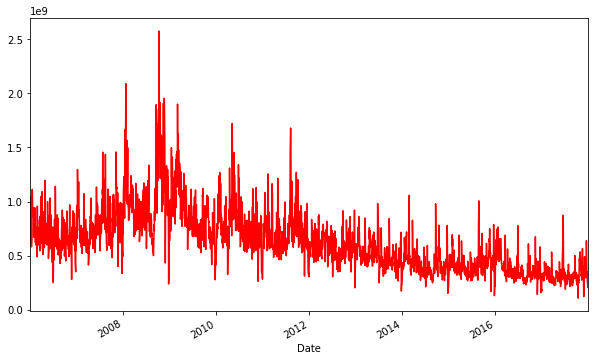

In [46]:
all2['Volume'].plot(figsize = (10,6),color = 'red')

In [29]:
all1 = all.groupby('Name').mean().sort_values('Volume',ascending = False).reset_index()

In [30]:
all1.head()

,Name,Open,High,Low,Close,Volume
0,AAPL,64.673309,65.256833,64.033445,64.662892,1.311457e+08
1,GE,25.132955,25.352649,24.891130,25.122232,5.367835e+07
2,MSFT,36.496817,36.827903,36.173190,36.513412,5.161762e+07
3,INTC,25.396744,25.659096,25.142136,25.407890,4.919834e+07
4,CSCO,24.031736,24.277714,23.793014,24.039632,4.440027e+07


# Mean Volume traded of each stock

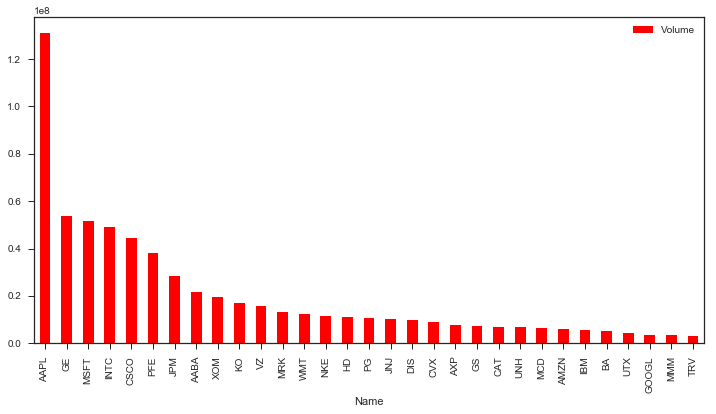

In [92]:
all1.plot.bar(x= 'Name',y='Volume',color = 'red', figsize = (12,6))

# Selecting top 4 stocks with highest volume traded

In [33]:
aapl = all[all['Name']=='AAPL']
GE = all[all['Name']=='GE']
MSFT = all[all['Name']=='MSFT']
INTC = all[all['Name']=='INTC']

In [34]:
aapl['returns'] = aapl['Close'].pct_change(1)
GE['returns'] = GE['Close'].pct_change(1)
MSFT['returns'] = MSFT['Close'].pct_change(1)
INTC['returns'] = INTC['Close'].pct_change(1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

# Calculating cumulative Returns of these 4 stocks

In [36]:
aapl['Cumulative Return'] = (1 + aapl['returns']).cumprod()
GE['Cumulative Return'] = (1 + GE['returns']).cumprod()
MSFT['Cumulative Return'] = (1 + MSFT['returns']).cumprod()
INTC['Cumulative Return'] = (1 + INTC['returns']).cumprod()



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

# Apple has the highest cumulative return (15.84 %)

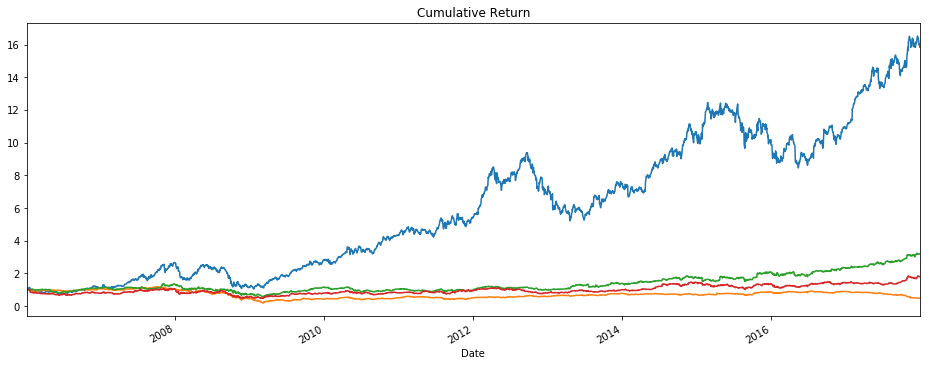

In [39]:
aapl['Cumulative Return'].plot(label = 'Apple',figsize=(16,6),title= 'Cumulative Return')
GE['Cumulative Return'].plot(label = 'GE')
MSFT['Cumulative Return'].plot(label = 'MSFT')
INTC['Cumulative Return'].plot(label = 'INTC')

# Thank You!! It was a great learning experience..